# 机器学习 实验三

**题目：参数估计 & 非参数估计**  
实验要求：  
1. 基本要求：  
   - 生成两个各包含 N=1000 个二维随机向量的数据集合 $X_1$ 和 $X_2$，数据集合中随机向量来自于三个分布模型，分别满足均值向量 $\mu_1=[1,4]$,$\mu_2=[4,1]$, $\mu_3=[8,4]$ 和协方差矩阵 $D_1=D_2=D_3=2\pmb{I}$ ，其中$\pmb{I}$是 $2*2$的单位矩阵。在生成数据集合 $X_1$ 时，假设来自三个分布模型的先验概率相同 ；而在生成数据集合 $X_2$ 时，先验概率如下：$p(w_1)=0.6$, $p(w_2)=0.3$, $p(w_3)=0.1$  
   - 在两个数据集合上分别应用“似然率测试规则” 和“最大后验概率规则” 进行分类实验，计算分类错误率，分析实验结果。  
2. 中级要求：在两个数据集合上使⽤⾼斯核函数估计⽅法，应⽤“似然率测试规则”分类和“最大后验概率规则”在 [0.1, 0.5, 1, 1.5, 2] 范围内交叉验证找到最优 h 值，分析实验结果。  
3. 高级要求：在两个数据集合上使⽤进⾏k-近邻概率密度估计，计算并分析 k=1，3，5 时的概率密度估计结果。

# 生成数据

In [1]:
import numpy as np
import sys
import matplotlib.pyplot as plt
import math
from mpl_toolkits.mplot3d import Axes3D

In [2]:
mean = np.array([[1,4],[4,1],[8,4]])
cov = [[2,0],[0,2]]
total_num = 1000
p1 = [1/3, 1/3, 1/3]
p2 = [0.6, 0.3, 0.1]

In [3]:
# 生成特定正态分布模型的数据
def generate_data(mean, cov, total_num, p, label):
    sample_num = round(total_num*p)
    x,y = np.random.multivariate_normal(mean, cov, sample_num).T
    data = []
    for i in range(sample_num):
        data.append([x[i],y[i],label]) # 带标签
    return data    

In [4]:
set1 = []
set2 = []
for i in range(3): # 每个数据集要单独生成每个分布模型的数据，拼在一起
    set1.append(generate_data(mean[i], cov, total_num, p1[i], i+1))
    set2.append(generate_data(mean[i], cov, total_num, p2[i], i+1))
set1 = np.vstack(np.array(set1, dtype=object))
set2 = np.vstack(np.array(set2, dtype=object))

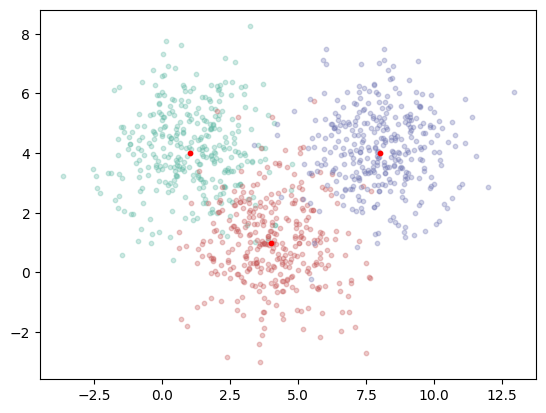

In [5]:
# 提取出x和y，画散点图
x1 = []
y1 = []
for i in range((set1.shape)[0]):
    x1.append(set1[i][0])
    y1.append(set1[i][1])
plt.scatter(x1[:333],y1[:333],s=10,c='#5eb8a4',alpha=0.3)
plt.scatter(x1[333:666],y1[333:666],s=10,c='#c45252',alpha=0.3)
plt.scatter(x1[666:],y1[666:],s=10,c='#6a71b0',alpha=0.3)
for i in range(3):
    plt.scatter(mean[i][0], mean[i][1], s=10, c='r')

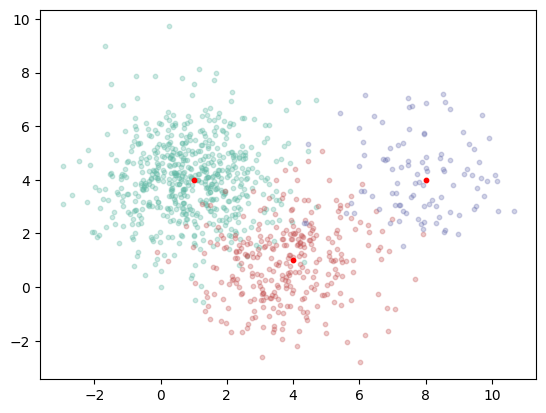

In [6]:
x2 = []
y2 = []
for i in range((set2.shape)[0]):
    x2.append(set2[i][0])
    y2.append(set2[i][1])
plt.scatter(x2[:600],y2[:600],s=10,c='#5eb8a4',alpha=0.3)
plt.scatter(x2[600:900],y2[600:900],s=10,c='#c45252',alpha=0.3)
plt.scatter(x2[900:],y2[900:],s=10,c='#6a71b0',alpha=0.3)
for i in range(3):
    plt.scatter(mean[i][0], mean[i][1], s=10, c='r')

# 基础要求

In [7]:
# 极大似然参数估计
def likelyhood(data):
    mu = np.mean(data, axis=0)
    cov = np.array([np.dot((data[i]-mu).reshape(2,1), (data[i]-mu).reshape(1,2)) for i in range(len(data))]).mean(axis=0)
    return mu, cov

In [8]:
# 测试
mu1_1, cov1_1 = likelyhood(set1[:333,0:2])
mu1_2, cov1_2 = likelyhood(set1[333:666,0:2])
mu1_3, cov1_3 = likelyhood(set1[666:,0:2])
mu_set1 = np.array([list(mu1_1), list(mu1_2), list(mu1_3)])
cov_set1 = np.array([list(cov1_1), list(cov1_2), list(cov1_3)])
mu2_1, cov2_1 = likelyhood(set2[:600,0:2])
mu2_2, cov2_2 = likelyhood(set2[600:900,0:2])
mu2_3, cov2_3 = likelyhood(set2[900:,0:2])
mu_set2 = np.array([list(mu2_1), list(mu2_2), list(mu2_3)])
cov_set2 = np.array([list(cov2_1), list(cov2_2), list(cov2_3)])
print(mu_set1)
print(mu_set2)
print(cov_set1)
print(cov_set2)

[[1.00986263 4.10988418]
 [4.03702776 0.9786539 ]
 [7.98517892 4.12991246]]
[[0.87007377 4.00736375]
 [3.80779534 0.91527784]
 [7.80790365 4.15597476]]
[[[2.142599033881898 0.03281381598589213]
  [0.03281381598589213 1.9260498557774675]]

 [[2.063914077714789 -0.07670978203325417]
  [-0.07670978203325417 2.0985262987942743]]

 [[2.0343872574420296 0.007163858149311487]
  [0.007163858149311487 1.735548901644442]]]
[[[ 1.77898808  0.04638684]
  [ 0.04638684  2.13297555]]

 [[ 1.87965261  0.20610805]
  [ 0.20610805  2.03499782]]

 [[ 1.73990347 -0.05024774]
  [-0.05024774  1.95170424]]]


In [9]:
# 计算概率 p(x|w)
def Gaussian_function(x, mu, cov):
    det_cov = np.linalg.det(cov.tolist()) # 方差矩阵的行列式
    inv_cov = np.linalg.inv(cov.tolist()) # 方差矩阵的逆
    P = np.exp(-1/2*np.dot(np.dot((x-mu).T, inv_cov), (x-mu)))
    P /= (2*np.pi*math.sqrt(det_cov)) # 根据公式计算概率
    return P

In [10]:
# 似然率测试规则
def likelyhood_test_rule(data, mean, cov):
    class_num = mean.shape[0] # 有几个类
    error = 0
    # 计算样本被分到每个类别的概率，取最大值
    for i in range(data.shape[0]): 
        p_predict = np.zeros(class_num)
        for j in range(class_num):
            p_predict[j] = Gaussian_function(data[i][0:2], mean[j], cov[j])
        p_class = np.argmax(p_predict) + 1
        if(p_class!=data[i][2]):
            error += 1
    return round(error/data.shape[0], 3)

In [11]:
# 最大后验概率规则
def posterior_test_rule(data, mean, cov, p):
    class_num = mean.shape[0] # 有几个类
    error = 0
    # 计算样本被分到每个类别的概率，取最大值
    for i in range(data.shape[0]): 
        p_predict = np.zeros(class_num)
        for j in range(class_num):
            p_predict[j] = Gaussian_function(data[i][0:2], mean[j], cov[j]) * p[j] # 似然率 * 先验概率
        p_class = np.argmax(p_predict) + 1
        if(p_class!=data[i][2]):
            error += 1
    return round(error/data.shape[0], 3)

In [12]:
MLE_1 = likelyhood_test_rule(set1, mu_set1, cov_set1)
MLE_2 = likelyhood_test_rule(set2, mu_set2, cov_set2)
print("似然率测试规则在两个数据集上的错误率为：", MLE_1, MLE_2)
MAP_1 = posterior_test_rule(set1, mu_set1, cov_set1, p1)
MAP_2 = posterior_test_rule(set2, mu_set2, cov_set2, p2)
print("最大后验概率规则在两个数据集上的错误率为：", MAP_1, MAP_2)

似然率测试规则在两个数据集上的错误率为： 0.056 0.076
最大后验概率规则在两个数据集上的错误率为： 0.056 0.063


根据上述测试结果，可以看出在先验概率分布比较均匀时，似然率和最大后验概率规则分类结果基本一致；但先验概率分布不均匀时，最大后验概率规则的错误率要低一些。

# 中级要求

In [13]:
def Gaussian_kernel(x, data, h):
    p = (1/(math.sqrt(2*np.pi)*h)) * np.array([np.exp(-1/2*np.dot(x-data[i], x-data[i])/(h**2)) for i in range(len(data))]).mean()
    return p

In [14]:
def Gaussian_likelihood(data, x, mean, cov, h):
    class_num = mean.shape[0]
    error = 0
    for i in range(data.shape[0]):
        p_predict = np.zeros(class_num)
        for j in range(class_num):
            p_predict[j] = Gaussian_kernel(data[i][0:2], x[j][:,0:2],h)
        p_class = np.argmax(p_predict) + 1
        if(p_class!=data[i][2]):
            error += 1
    return round(error/data.shape[0],3)

In [15]:
def Gaussian_posterior(data, x, mean, cov, p, h):
    class_num = mean.shape[0]
    error = 0
    for i in range(data.shape[0]):
        p_predict = np.zeros(class_num)
        for j in range(class_num):
            p_predict[j] = Gaussian_kernel(data[i][0:2], x[j][:,0:2],h) * p[j]
        p_class = np.argmax(p_predict) + 1
        if(p_class!=data[i][2]):
            error += 1
    return round(error/data.shape[0],3)

In [16]:
h = [0.1, 0.5, 1, 1.5, 2]
set1_slice = [set1[:333],set1[333:666],set1[666:]]
set2_slice = [set2[:600],set2[600:900],set2[900:]]
Gauss_MLE_1 = []
Gauss_MLE_2 = []
Gauss_MAP_1 = []
Gauss_MAP_2 = []
for i in range(len(h)):
    print("h =", h[i])
    Gauss_MLE_1.append(Gaussian_likelihood(set1, set1_slice, mu_set1, cov_set1, h[i]))
    Gauss_MLE_2.append(Gaussian_likelihood(set2, set2_slice, mu_set2, cov_set2, h[i]))
    print("使用高斯核函数方法，似然率测试规则在两个数据集上的错误率为：", Gauss_MLE_1[i], Gauss_MLE_2[i])
    Gauss_MAP_1.append(Gaussian_posterior(set1, set1_slice, mu_set1, cov_set1, p1, h[i]))
    Gauss_MAP_2.append(Gaussian_posterior(set2, set2_slice, mu_set2, cov_set2, p2, h[i]))
    print("使用高斯核函数方法，最大后验概率规则在两个数据集上的错误率为：", Gauss_MAP_1[i], Gauss_MAP_2[i])

h = 0.1
使用高斯核函数方法，似然率测试规则在两个数据集上的错误率为： 0.017 0.02
使用高斯核函数方法，最大后验概率规则在两个数据集上的错误率为： 0.017 0.009
h = 0.5
使用高斯核函数方法，似然率测试规则在两个数据集上的错误率为： 0.054 0.065
使用高斯核函数方法，最大后验概率规则在两个数据集上的错误率为： 0.054 0.054
h = 1
使用高斯核函数方法，似然率测试规则在两个数据集上的错误率为： 0.056 0.073
使用高斯核函数方法，最大后验概率规则在两个数据集上的错误率为： 0.056 0.059
h = 1.5
使用高斯核函数方法，似然率测试规则在两个数据集上的错误率为： 0.055 0.077
使用高斯核函数方法，最大后验概率规则在两个数据集上的错误率为： 0.055 0.065
h = 2
使用高斯核函数方法，似然率测试规则在两个数据集上的错误率为： 0.056 0.078
使用高斯核函数方法，最大后验概率规则在两个数据集上的错误率为： 0.056 0.082


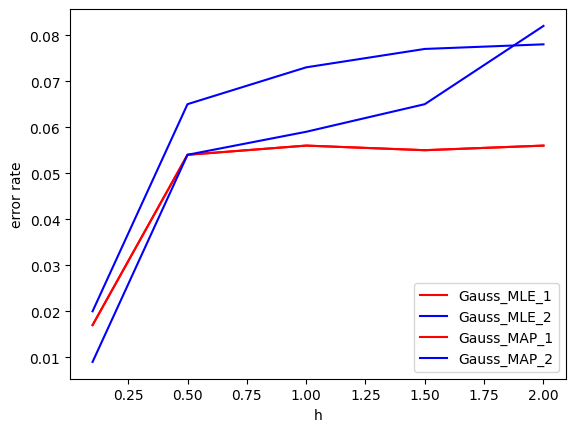

In [56]:
plt.figure()
plt.plot(h, Gauss_MLE_1, 'r', label='Gauss_MLE_1')
plt.plot(h, Gauss_MLE_2, 'b', label='Gauss_MLE_2')
plt.plot(h, Gauss_MAP_1, 'r', label='Gauss_MAP_1')
plt.plot(h, Gauss_MAP_2, 'b', label='Gauss_MAP_2')
plt.xlabel('h')
plt.ylabel('error rate')
plt.legend()
plt.show()

由图，似然率和最大后验概率测试规则的最优 h 值都为 0.1。

# 高级要求

In [51]:
def k_neighbor(data, k):
    num = data.shape[0]
    # 生成40000个采样点
    test_p = np.zeros((200, 200, 3))
    for i in range(200):
        for j in range(200):
            # 采样点分布在 [-6,14] 范围内，step=0.1
            x = 0.1*i -6
            y = 0.1*j -6
            # 计算采样点到每个数据点的距离
            dist = []
            for m in range(num):
                dist.append(math.sqrt((data[m][0]-x)**2 + (data[m][1]-y)**2))
            # 对距离排序，找到距离最近的k个数据点，增加对应类别的权重
            sorted_index = np.argsort(dist)
            weight = np.zeros(3)
            weight[0] = sum(data[l][2] == 1 for l in sorted_index[:k])
            weight[1] = sum(data[l][2] == 2 for l in sorted_index[:k])
            weight[2] = sum(data[l][2] == 3 for l in sorted_index[:k])
            V = np.pi*(dist[sorted_index[k]]**2)
            # 计算采样点的概率密度函数
            test_p[i][j][0] = weight[0]/V/num
            test_p[i][j][1] = weight[1]/V/num
            test_p[i][j][2] = weight[2]/V/num
    return test_p

In [53]:
k = [1,3,5]
p = []
for i in range(len(k)):
    p.append(k_neighbor(set2, k[i]))

In [54]:
def show_kneighbor(p,k):
    x_p, y_p = np.mgrid[-5:15:200j, -5:15:200j]
    z1 = p[:,:,0]
    z2 = p[:,:,1]
    z3 = p[:,:,2]
    fig = plt.figure(figsize=(15,5))
    ax = plt.subplot(1,3,1,projection='3d')
    ax.plot_surface(x_p,y_p,z1,cmap=plt.cm.coolwarm)
    ax.set_title('sample: set2, k={}, label:1'.format(k))
    ax.set_xlabel('x')
    ax.set_ylabel('y')

    ax = plt.subplot(1,3,2,projection='3d')
    ax.plot_surface(x_p,y_p,z2,cmap=plt.cm.coolwarm)
    ax.set_title('sample: set2, k={}, label:2'.format(k))
    ax.set_xlabel('x')
    ax.set_ylabel('y')

    ax = plt.subplot(1,3,3,projection='3d')
    ax.plot_surface(x_p,y_p,z3,cmap=plt.cm.coolwarm)
    ax.set_title('sample: set2, k={}, label:3'.format(k))
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    
    plt.show()
    return

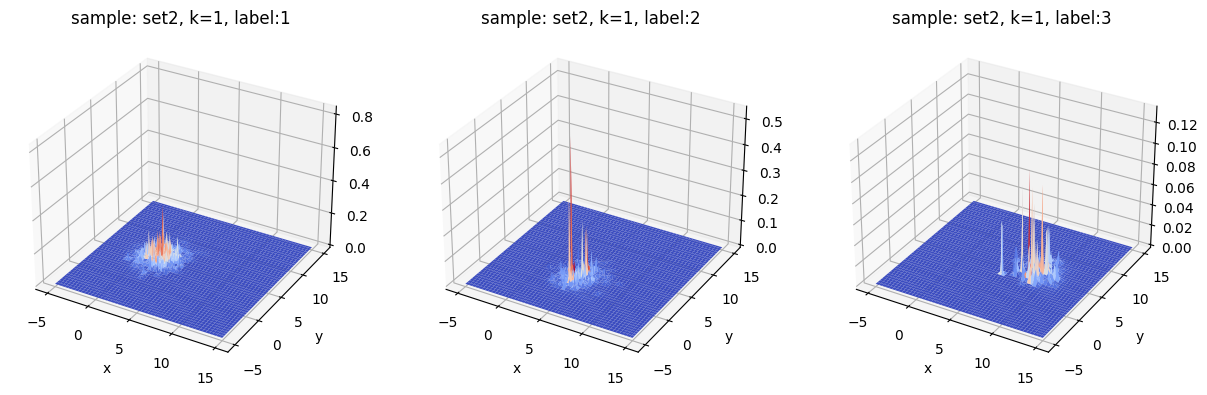

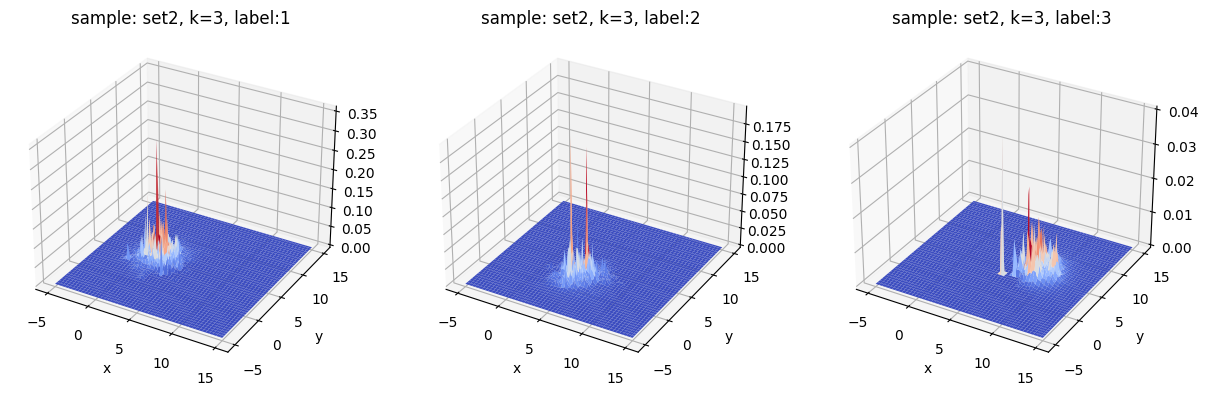

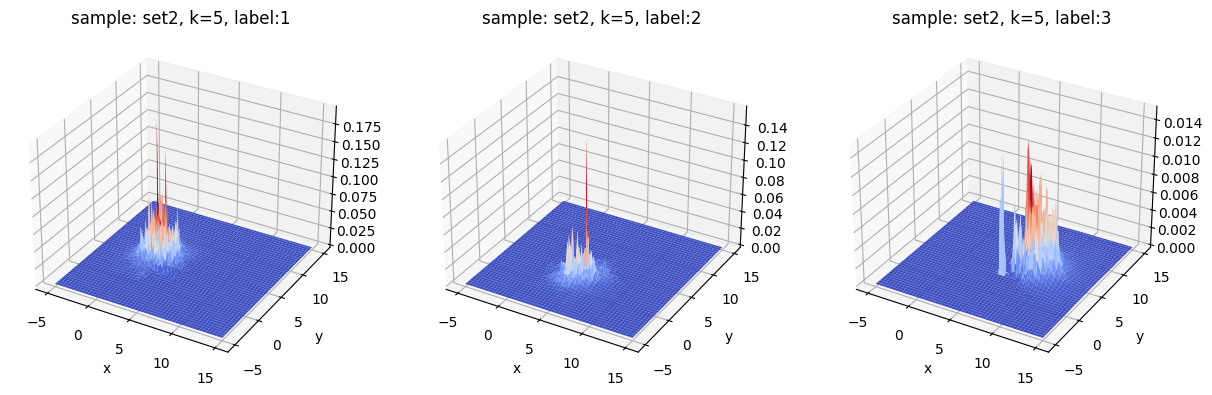

In [55]:
for i in range(len(p)):
    show_kneighbor(p[i],k[i])

如图，因为采样点分布较为密集，可以看出在k值稍微大一些（k=5）的情况下，估计出的概率密度分布比较准确。